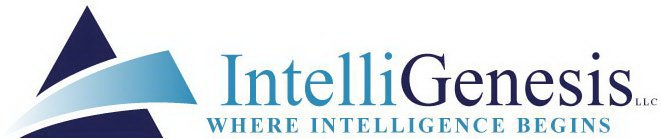

<!DOCTYPE html>
<head>
<h1 style="text-align:center"> Introduction to Machine Learning </h1>
 </head>

<body>
<p style="text-align: left; font-size:120%; font-family:verdana"> 
  Machine learning is a branch of artificial intelligence that studies the design of algorithms that can be trained and adjusted based on available data. Typical machine learning tasks are concept learning, function learning or “predictive modeling”, clustering and finding predictive patterns.  Machine learning hopes that including the instrustions or experiences into its' algorithms and tasks will eventually improve the learning. The ultimate goal is to advance the algorithm computations through this training/learning process in such a way that it becomes automatic, so that humans like ourselves don’t need to interfere any more.
</p>
<p style="text-align: left; font-size:120%; font-family:verdana">
  This tutorial is meant to introduce you to the basics of machine learning in Jupyter with Python and associated libraries: more specifically, it will show you how to use this environment import data, explore the data and to work with the well-known machine learning algorithm called “KNN” or k-nearest neighbors.
</p>
<p style="text-align: left; font-size:120%; font-family:verdana">
  The data we will be utilizing is various measurements of components of Irises. The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). These measurements will be used to create a linear discriminant model to classify the species. 
</p>
<br>
<br>
</body>

# First we need to set our environment with the needed libraries

In [ ]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [ ]:
from pandas.plotting import (scatter_matrix, radviz)
from sklearn.model_selection import (train_test_split, cross_val_score, KFold)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)

### Next is to bring in the data and convert the set over to a Pandas Dataframe

In [ ]:
col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data_link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

df = pd.read_csv(data_link, names= col_names)

In [ ]:
print(df)

# The data that we just pulled in is of Iris Petals and Sepal and the three classes are Versicolor, Setosa, Virginica like the images below.

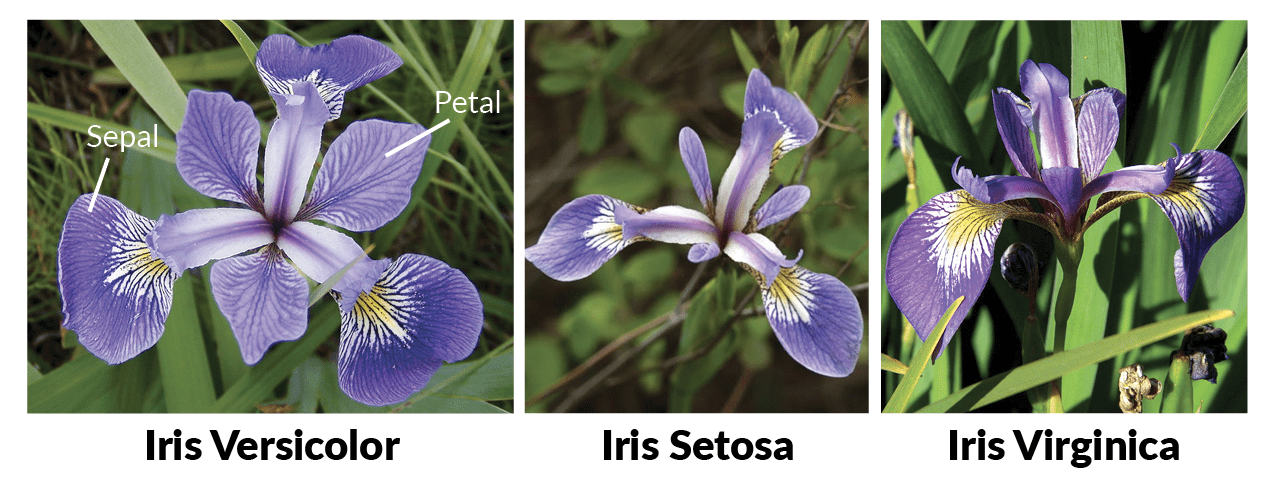

### From here we now have to ability to conduct very basic Exploratory Data Analysis (EDA).

In [ ]:
df.groupby('class').size()

### The data within this dataframe is ......

In [ ]:
df.plot(kind='box', subplots = False, layout=(1,4), sharex = True, figsize=(10,5))
plt.show()

## Understanding the Box Plot
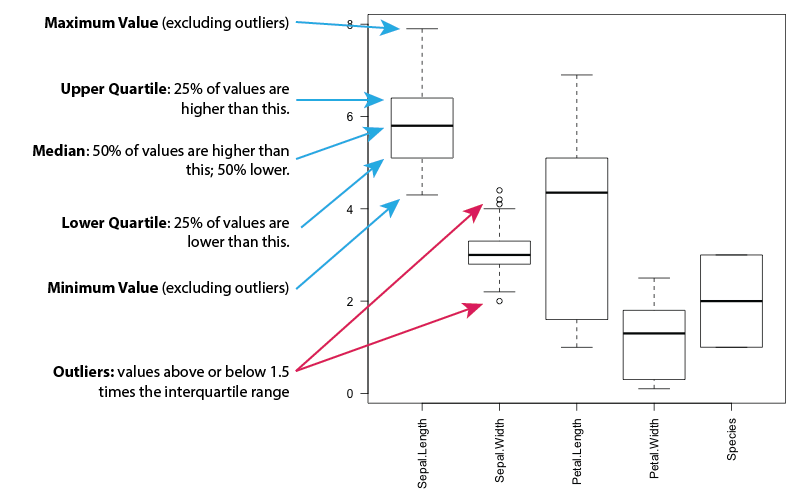

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

In [ ]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = .35
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=[8,4])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h4> The classification report below contains key metrics in a classification problem after it is executed to help make a determination on how well your selected algorithm.</h4>

You'll have precision, recall, f1-score and support for each class you're trying to find.

##### Recall 
How many of this class you find over the whole number of element of this class
##### Precision 
How many are correctly classified among that class
##### f1-score 
The harmonic mean between precision & recall
##### Support 
The number of occurence of the given class in your dataset 

In [ ]:
# Make predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(classification_report(Y_validation, predictions))

# We can use a Radviz to view some of the same information to validate, that our machine learning is close to what is actually happening within the data that we currently have.

In [ ]:
plt.figure(figsize=(12,10))
radviz(df,'class')
plt.show()